In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import geopandas as gp
from shapely.geometry import Point, Polygon

In [47]:
mappingData = pd.read_csv('./full_wCoord.csv')
shapefile = './Ames/Ames Precincts.shp'
df_neighbourhoods=gp.read_file(shapefile)

In [79]:
mappingData

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea_x,Street,Alley,LotShape,...,Date,Source,NmbrBRs,coord,dist_stadium,dist_downtown,dist_airport,PricePerSqft,latitude,longitude
0,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,IR1,...,10-Jul-20,Ames City Assessor,3.0,"(42.053808, -93.618344)",4.417461,3.210441,6.102121,129.830918,42.053808,-93.618344
1,526302030,1293,149900,20,RL,NaN,11027,Pave,NaN,IR1,...,10-Jul-20,Ames City Assessor,2.0,"(42.053668, -93.618459)",4.399660,3.196132,6.086080,115.931941,42.053668,-93.618459
2,526302040,1024,157500,20,RL,85.0,10533,Pave,NaN,IR1,...,10-Jul-20,Ames City Assessor,2.0,"(42.05357834520508, -93.61827582597934)",4.395200,3.184448,6.076963,153.808594,42.053578,-93.618276
3,526302110,882,124500,20,RL,74.0,13008,Pave,NaN,IR1,...,10-Jul-20,Ames City Assessor,2.0,"(42.05284062808919, -93.61863289727206)",4.308096,3.106740,5.993553,141.156463,42.052841,-93.618633
4,526302120,1797,169000,20,RL,NaN,11765,Pave,NaN,IR1,...,10-Jul-20,Ames City Assessor,3.0,"(42.05285252734815, -93.61867770937495)",4.308129,3.108530,5.994682,94.045632,42.052853,-93.618678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,924100070,1389,170000,20,RL,77.0,10010,Pave,NaN,Reg,...,10-Jul-20,Ames City Assessor,2.0,"(41.9933402, -93.6041191)",3.646407,3.618130,1.635400,122.390209,41.993340,-93.604119
2620,924151040,1803,285000,20,RL,76.0,9892,Pave,NaN,Reg,...,10-Jul-20,Ames City Assessor,3.0,"(41.989745529068436, -93.59996872621437)",4.171541,4.091171,2.118971,158.069884,41.989746,-93.599969
2621,924151050,2000,188000,60,RL,74.0,9627,Pave,NaN,Reg,...,10-Jul-20,Ames City Assessor,3.0,"(41.989269962685945, -93.59996163163196)",4.209341,4.142068,2.145477,94.000000,41.989270,-93.599962
2622,924152030,1797,231000,60,RL,74.0,12961,Pave,NaN,Reg,...,10-Jul-20,Ames City Assessor,3.0,"(41.98920287894761, -93.60018413490596)",4.201709,4.144171,2.133318,128.547579,41.989203,-93.600184


In [78]:
def convert_latitude(coordinate):
    return float(str(coordinate).replace("(","").replace(")","").split(",")[0])
def convert_longitude(coordinate):
    if (len(str(coordinate).replace("(","").replace(")","").split(",")))==2:
        return float(str(coordinate).replace("(","").replace(")","").split(",")[1])
    else:
        return 0
mappingData["latitude"]=mappingData['coord'].apply(convert_latitude)
mappingData["longitude"]=mappingData['coord'].apply(convert_longitude)

<AxesSubplot:>

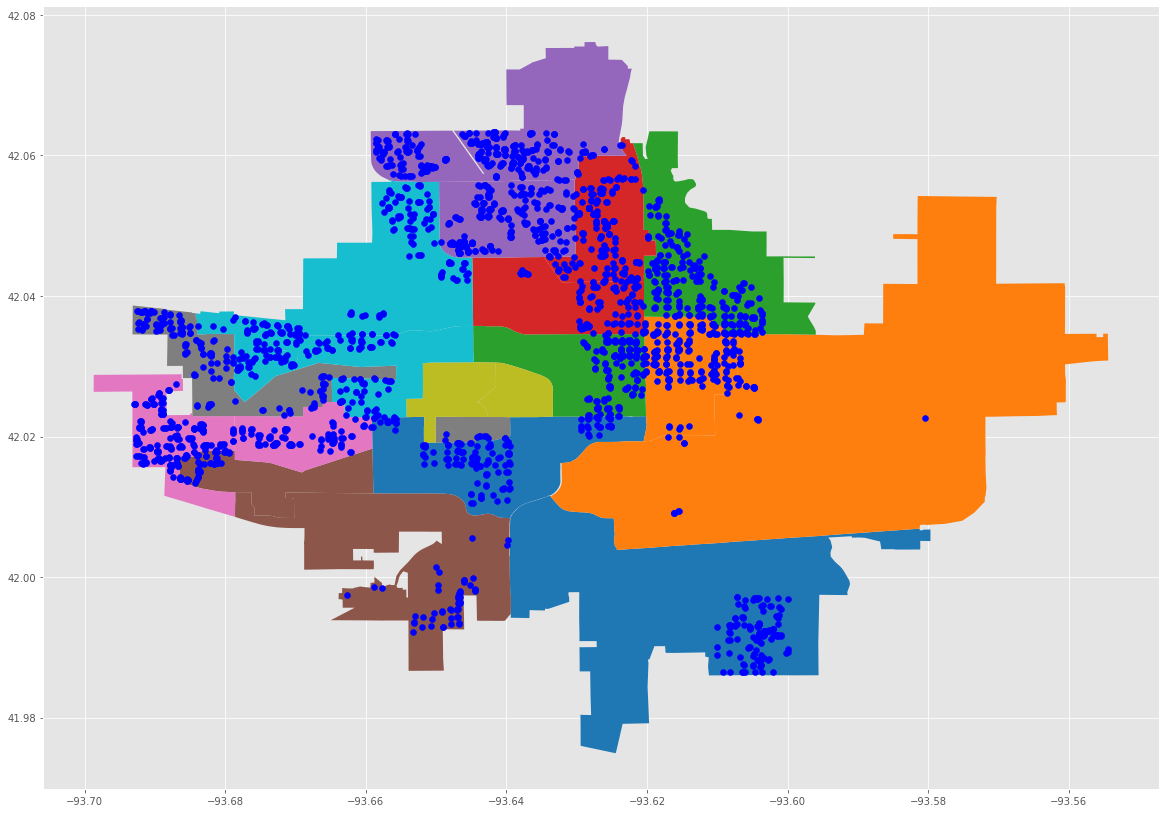

In [83]:
amesPoints = pd.DataFrame({
    'Point':mappingData['PID'].tolist(),
    'Latitude':mappingData['latitude'].tolist(),
    'Longitude':mappingData['longitude'].tolist()
})
gdf = gp.GeoDataFrame(amesPoints, geometry=gp.points_from_xy(amesPoints.Longitude, amesPoints.Latitude))
ax=df_neighbourhoods.plot(column="NAME", cmap=None,figsize=(20, 20))

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.Point):
    ax.annotate("", xy=(x, y), xytext=(3, 3), textcoords="offset points")
gdf.plot(ax=ax,color="blue")

<AxesSubplot:>

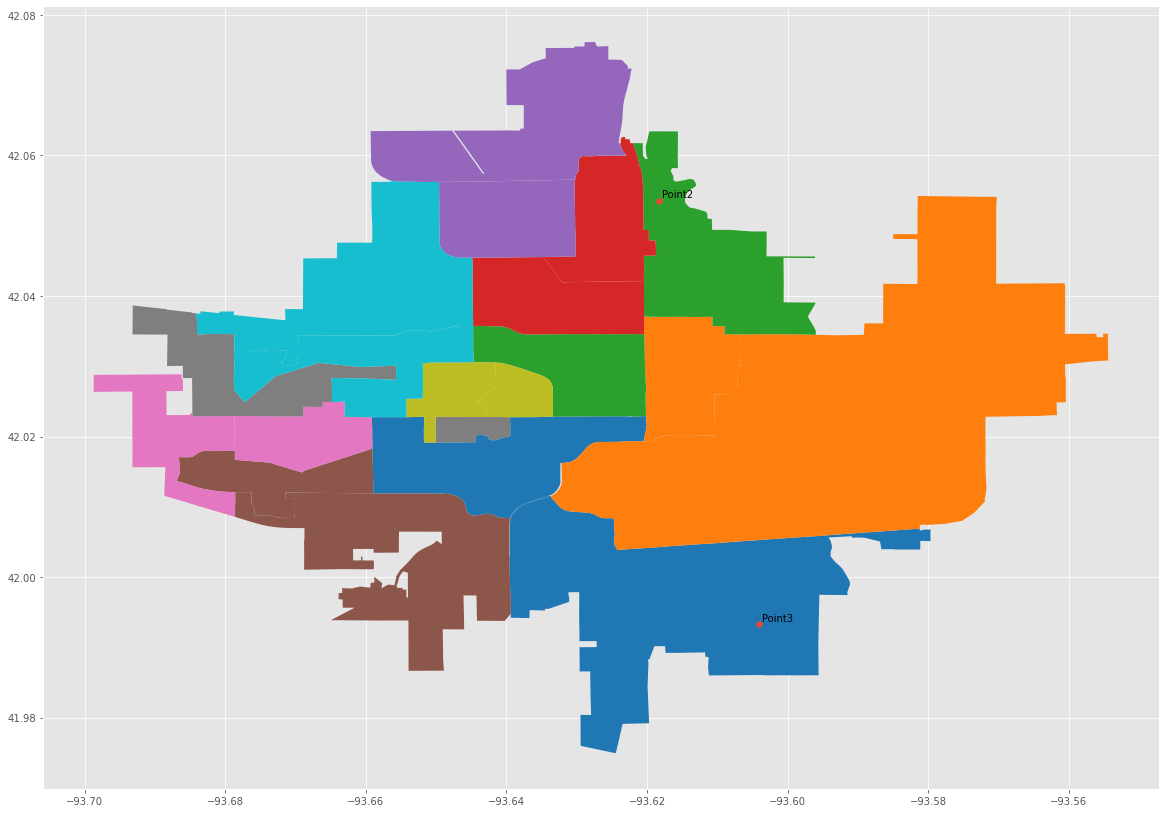

In [54]:
testPoints = pd.DataFrame({
    'Point':["Point2", "Point3"],
    'Latitude':[42.05357834520508, 41.9933402],
    'Longitude':[-93.61827582597934, -93.6041191]
})
gdf = gp.GeoDataFrame(amesPoints, geometry=gp.points_from_xy(testPoints.Longitude, testPoints.Latitude))
ax=df_neighbourhoods.plot(column="NAME", cmap=None,figsize=(20, 30))

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.Point):
    ax.annotate(label,xy=(x, y), xytext=(3, 3), textcoords="offset points")
gdf.plot(ax=ax)